# STEP3 TA IndéMode  データ取得 近隣サロン

>### 環境構築

ターミナルにて  
 ● pip install requests  
 ● pip install beautifulsoup4  
 ● pip install gspread  
 ● pip install google-auth

>### 活用サイト

楽天Beauty  
https://beauty.rakuten.co.jp/

規約確認  
✔ https://beauty.rakuten.co.jp/robots.txt  
　→「Disallow:/rent_store 」を検索 → 無し  
✔ プライバシーポリシー  
　→スクレイピング・クローリング禁止の記載なし

>### コード

In [2]:
# ライブラリインポート
from time import sleep
import requests
from bs4 import BeautifulSoup
import pandas as pd
import gspread 
from google.oauth2 import service_account
import json
import sqlite3

# 情報格納のための空配列を用意
s_name = []
s_access = []
s_price = []


# HTML取得
URL = 'https://beauty.rakuten.co.jp/addr13101/page{}/'

# 複数ページ取得のためのループ処理
for i in range(1,6):

    # 変数trget_urlに、アクセス先のURLを格納する
    target_url = URL.format(i)

    #サーバー負荷低減のための1s待機
    sleep(1)

    #print()してtrget_url確認
    print(target_url)

    # リクエスト
    res = requests.get(target_url)

    # リクエスト結果を確認
    #result = res.text
    #print(result)

    # 文字コード変換 (→ utf-8 )
    res.encoding = 'utf-8'

    # 文字化けしていないかhtmlを確認
    #print(res.text)

    # BeautifulSoup(解析したいデータ,解析する方法)を指定し、soupに代入
    soup = BeautifulSoup(res.text, "html.parser")
    #print(soup)

    # sectionデータ(1物件分データ)の取得
    property_section = soup.select('div.m-shopCard__headerContent')

    # 取得したセクションすべての数を確認します。
    print(len(property_section))

    # property_sectionからsectionを1つずつ取り出してpsに代入。
    for ps in property_section:
        ps1 = ps.select('h3.m-shopCard__shopName')[0].text
        ps2 = ps.select('li.m-shopCard__headerOutlineItem')[0].text.replace("アクセス：","")
        ps3 = ps.select('li.m-shopCard__headerOutlineItem')[1].text.replace("カット単価：","").replace("～","").replace("￥","")

        # それぞれ抽出したデータを配列に追加
        s_name.append(ps1)
        s_access.append(ps2)
        s_price.append(ps3)
        
    # 物件数確認
    #print('サロン件数', len(s_name))

# データ定義
data_list = {
    "サロン名" : s_name,
    "アクセス" : s_access,
    "カット単価(円~)" : s_price,
}

# データフレーム作成
df = pd.DataFrame(data_list)

# 重複データ処理
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
display(df)

# csv保存
#df.to_csv('東京都新宿区の貸店舗・テナント物件一覧_店舗ネットワーク.csv', index=False)

# スプレッドシートの認証設定
#SP_CREDENTIAL_FILE = 'gspread-test-399313-ca3a69c4d75e.json' #個人の認証キーのjsonファイルのパスを記入
#SP_COPE = [
#    'https://www.googleapis.com/auth/drive',
#    'https://spreadsheets.google.com/feeds'
#]
#credentials = service_account.Credentials.from_service_account_file(SP_CREDENTIAL_FILE, scopes=SP_COPE)
#gc = gspread.authorize(credentials)

#スプレッドシート/シート指定
#SP_SHEET_KEY = '1474-fT6RkuGOvPwjyCJIEtD6qrNjI6EP2bw3vtHvLBc' #川名のスプレッドシート
#SP_SHEET = '最寄駅近隣サロンDB'

# スプレッドシート/シートを選択して初期化既存データ削除）
#sh = gc.open_by_key(SP_SHEET_KEY)
#worksheet = sh.worksheet(SP_SHEET)
#worksheet.clear() 

# DataFrameをシートに書き込む
#worksheet.update([filtered_df.columns.values.tolist()] + filtered_df.values.tolist())
#worksheet.update(values=[df.columns.values.tolist()] + df.values.tolist(), range_name='A1')

#print('スプレッドシートへの書き込みが完了しました')

https://beauty.rakuten.co.jp/addr13101/page1/
27
https://beauty.rakuten.co.jp/addr13101/page2/
0
https://beauty.rakuten.co.jp/addr13101/page3/
0
https://beauty.rakuten.co.jp/addr13101/page4/
0
https://beauty.rakuten.co.jp/addr13101/page5/
0


,サロン名,アクセス,カット単価(円~)
0,APHRODITE GINZA 秋葉原店(アフロディーテ ギンザ アキハバラテン),各線 秋葉原駅「昭和通り口」徒歩3分、東京メトロ日比谷線 秋葉原駅「１」徒歩2分,"3,850"
1,APHRODITE GINZA 神保町(アフロディーテ ギンザ ジンボウチョウ),各線 神保町駅 徒歩3分,"4,400"
2,ヒロ銀座BARBER SHOP 秋葉原店(ヒロギンザバーバーショップ アキハバラテン),各線 秋葉原駅 徒歩1分,"5,500"
3,K-STYLE HAIR STUDIO 神保町店(ケースタイル),神保町駅A5出口 徒歩3分 、JR中央線 御茶ノ水駅 徒歩6分 東京メトロ千代田線 新御茶...,"4,455"
4,K-STYLE HAIR STUDIO(ケースタイルヘアスタジオ),●JR山手線・京浜東北線 有楽町駅日比谷口を出て、ビックカメラを背に線路を左手に歩き、大きな...,"4,950"
5,K-STYLE HAIR STUDIO 水道橋(ケースタイルヘアスタジオ スイドウバシ),JR総武線 水道橋駅 徒歩4分、都営三田線、都営新宿線 神保町駅 徒歩5分,"3,300"
6,ヒロ銀座ヘアーサロン神田店(ヒロギンザヘアーサロンカンダテン),各線 神田駅 徒歩1分,"3,960"
7,LAVIE NEW STANDARD BARBER 秋葉原神田店 理容室(ラヴィ ニュウスタ...,【各線 秋葉原駅 徒歩4分】JR中央改札口を出て右へ直進。交差点を渡り右折。「神田ふれあい橋...,"4,400"
8,Alushe 秋葉原店【メンズ/ヘッドスパ/秋葉原】(アルーシェ アキハバラテン),JR山手線 秋葉原駅 徒歩2分、JR総武線 浅草橋駅 徒歩5分,"3,300"
9,Y's BARBER GINZA 御茶ノ水店(ワイズ バーバー ギンザ オチャノミズ),都営新宿線 【小川町(東京)駅】 \r\n丸の内線 【淡路町駅】\r\n千代田線 【新御茶ノ...,"6,300"


In [3]:
# SQLでDBにデータ保存
# SQLiteデータベースへの接続
db_path = "STEP3チーム課題_TA_IndéMode_DB.db"
conn = sqlite3.connect(db_path) 

# データフレームをSQLiteデータベースに書き込む
table_name = '近隣サロン一覧_楽天beauty'  # テーブル名を適切なものに変更してください
df.to_sql(table_name, conn, if_exists='replace', index=False)

print(db_path + ' への書き込みが完了しました')

STEP3チーム課題_TA_IndéMode_DB.db への書き込みが完了しました


In [6]:
# DBからデータを読み取り、近隣サロンの価格帯を表示

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt #グラフ描画ライブラリ
import japanize_matplotlib # matplotlib日本語化対応ライブラリ
import seaborn as sns

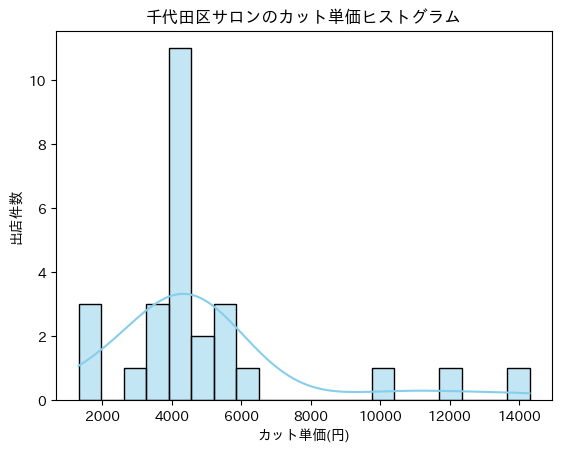

In [26]:
# SQLiteデータベース接続
conn = sqlite3.connect('STEP3チーム課題_TA_IndéMode_DB.db')

# SQLクエリを実行してデータフレームに読み込む
query = 'SELECT * FROM "近隣サロン一覧_楽天beauty";'  
df = pd.read_sql_query(query, conn)

# データベース接続を閉じる
conn.close()

# display(df)

df['カット単価(円~)'] = df['カット単価(円~)'].str.replace(',', '').astype(float) #データ数値化
df = df.sort_values(by='カット単価(円~)') #データ整列

# display(df)

sns.histplot(df['カット単価(円~)'], bins=20, kde=True, color='skyblue')  # kde=Trueでカーネル密度推定も表示
plt.xlabel('値')
plt.xlabel('カット単価(円)')
plt.ylabel('出店件数')
plt.title('千代田区サロンのカット単価ヒストグラム')
plt.show()


>雑コード

In [33]:
ps = property_section[0]
ps1 = ps.select('h3.m-shopCard__shopName')[0].text
print(ps1)
ps2 = ps.select('li.m-shopCard__headerOutlineItem')[0].text
print(ps2)
ps3 = ps.select('li.m-shopCard__headerOutlineItem')[1].text
ps3

Euphoria GINZA GRANDE 銀座(ユーフォリア　ギンザ　グランデ)
アクセス：銀座駅 徒歩1分
、有楽町駅 徒歩5分


'カット単価：￥5,500～'